## Homework 04: Biden redux

### MACS 30100 Perspectives on Computational Modeling, Dr. Soltoff

Ellen Hsieh

3 Feb 2019

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, LeavePOut
from sklearn.model_selection import RepeatedKFold, KFold, cross_val_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### 1.

In [2]:
nes = pd.read_csv('./data/nes2008.csv')

biden = nes[['biden']].values
preds = nes[['female', 'age', 'educ', 'dem', 'rep']].values

In [3]:
# the function to calculate the MSE
def cal_mse(x_train, x_test, y_train, y_test):
    reg = LinearRegression().fit(x_train, y_train)
    pred = reg.predict(x_test)
    mse = mean_squared_error(y_test, pred)    
    return mse

In [4]:
# using the traditional approach
tra_mse = cal_mse(preds, preds, biden, biden)
print('The MSE of the model using the traditional approach: {}'.format(tra_mse))

The MSE of the model using the traditional approach: 395.2701692786484


#### 2.

In [5]:
# using the validation set approach
x_train, x_test, y_train, y_test = train_test_split(preds, biden, train_size=0.7, random_state=124)
val_mse = cal_mse(x_train, x_test, y_train, y_test)
print('The MSE of the model using the validation set approach: {}'.format(val_mse))

The MSE of the model using the validation set approach: 407.8565960011873


The test MSE of the model using validation approach is higher than the traditional approach in this split.

#### 3.

In [6]:
# simulate 1000 time of the validation approach
sim_val_mse = np.zeros(1000)
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(preds, biden, train_size=0.7)
    val_mse = cal_mse(x_train, x_test, y_train, y_test)
    sim_val_mse[i] = val_mse

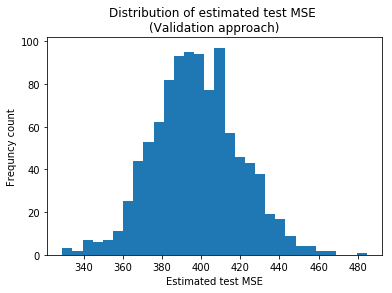

In [7]:
from itertools import groupby
freq = {key:len(list(group)) for key, group in groupby(np.sort(sim_val_mse))}

plt.hist(sim_val_mse, bins=30)
plt.xlabel('Estimated test MSE')
plt.ylabel('Frequncy count')
plt.title('Distribution of estimated test MSE \n(Validation approach)')
plt.show()

The test MSE varies depends on how the data is split into training and testing set.

#### 4.

In [8]:
# using LOOCV approach
loo = LeaveOneOut()
x_tr_lst = []
x_te_lst = []
y_tr_lst = []
y_te_lst = []
for train_index, test_index in loo.split(preds):
    x_train, x_test = preds[train_index], preds[test_index]
    y_train, y_test = biden[train_index], biden[test_index]
    x_tr_lst.append(x_train)
    x_te_lst.append(x_test)
    y_tr_lst.append(y_train)
    y_te_lst.append(y_test)

In [9]:
loocv_mse = np.zeros(len(x_tr_lst))
for i in range(len(x_tr_lst)):
    mse = cal_mse(x_tr_lst[i], x_te_lst[i], y_tr_lst[i], y_te_lst[i])
    loocv_mse[i] = mse

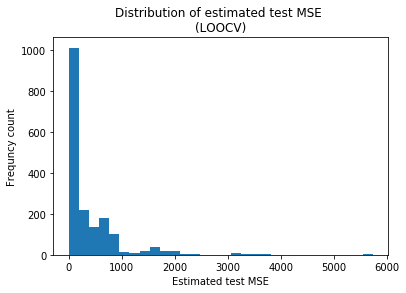

In [10]:
freq = {key:len(list(group)) for key, group in groupby(np.sort(loocv_mse))}

plt.hist(loocv_mse, bins=30)
plt.xlabel('Estimated test MSE')
plt.ylabel('Frequncy count')
plt.title('Distribution of estimated test MSE \n(LOOCV)')
plt.show()

In [11]:
print('The mean of the test MSE of LOOCV: {}'.format(loocv_mse.mean()))
print('The standard deviation of the test MSE of LOOCV: {}'.format(loocv_mse.std()))

The mean of the test MSE of LOOCV: 397.9555045548882
The standard deviation of the test MSE of LOOCV: 624.7769804543174


The test MSE varies widely in LOOCV, but it provides an unbaised estimate of the model MSE.

#### 5.

In [12]:
# using 10-fold CV approach
kf = KFold(n_splits=10)
x_tr_lst = []
x_te_lst = []
y_tr_lst = []
y_te_lst = []

for train_index, test_index in kf.split(preds):
    x_train, x_test = preds[train_index], preds[test_index]
    y_train, y_test = biden[train_index], biden[test_index]
    x_tr_lst.append(x_train)
    x_te_lst.append(x_test)
    y_tr_lst.append(y_train)
    y_te_lst.append(y_test)

In [13]:
kf_mse = np.zeros(len(x_tr_lst))
for i in range(len(x_tr_lst)):
    mse = cal_mse(x_tr_lst[i], x_te_lst[i], y_tr_lst[i], y_te_lst[i])
    kf_mse[i] = mse

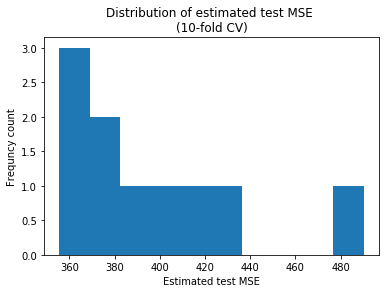

In [14]:
freq = {key:len(list(group)) for key, group in groupby(np.sort(kf_mse))}

plt.hist(kf_mse)
plt.xlabel('Estimated test MSE')
plt.ylabel('Frequncy count')
plt.title('Distribution of estimated test MSE \n(10-fold CV)')
plt.show()

In [15]:
print('The mean of the test MSE of 10-fold CV: {}'.format(kf_mse.mean()))
print('The standard deviation of the test MSE of 10-fold CV: {}'.format(kf_mse.std()))

The mean of the test MSE of 10-fold CV: 397.97984494721845
The standard deviation of the test MSE of 10-fold CV: 37.73043590987476


The average of the test MSE of 10-fold CV is slightly higher than LOOCV approach.

#### 6. 

In [16]:
result_tra = sm.OLS(nes['biden'], sm.add_constant(nes[['female', 'age', 'educ', 'dem', 'rep']])).fit()
print(result_tra.summary())

                            OLS Regression Results                            
Dep. Variable:                  biden   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sat, 02 Feb 2019   Prob (F-statistic):          1.50e-126
Time:                        15:09:51   Log-Likelihood:                -7966.6
No. Observations:                1807   AIC:                         1.595e+04
Df Residuals:                    1801   BIC:                         1.598e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8113      3.124     18.823      0.0

In [17]:
# fit the model using bootstrap samples
from sklearn.utils import resample
result_bs = []
for i in range(1000):
    sub_sample = resample(nes)
    result_bs.append(sm.OLS(sub_sample['biden'], 
                         sm.add_constant(sub_sample[['female', 'age', 'educ', 'dem', 'rep']])).fit())

In [19]:
# get the parameters from 1000 bootstrap
param_const = np.zeros(1000)
param_female = np.zeros(1000)
param_age = np.zeros(1000)
param_educ = np.zeros(1000)
param_dem = np.zeros(1000)
param_rep = np.zeros(1000)

for i in range(len(result_bs)):
    param_const[i] = result_bs[i].params[0]
    param_female[i] = result_bs[i].params[1]
    param_age[i] = result_bs[i].params[2]
    param_educ[i] = result_bs[i].params[3]
    param_dem[i] = result_bs[i].params[4]
    param_rep[i] = result_bs[i].params[5]

In [20]:
# print the table of mean and SE using the bootstrap
print("\t\t\tTradiationl\t\t   Bootstrap(B=1000)")
print("\t\t---------------------------------------------------------")
print ("\t\testimate\tstd err\t\testimate\tstd err")
print ("--------------------------------------------------------------------------")
print ("%s\t\t%f\t%f\t%f\t%f" % ('const', result_tra.params[0], result_tra.bse[0],
                                 param_const.mean(), param_const.std()))
print ("%s\t\t%f\t%f\t%f\t%f" % ('female', result_tra.params[1], result_tra.bse[1], 
                                 param_female.mean(), param_female.std()))
print ("%s\t\t%f\t%f\t%f\t%f" % ('age', result_tra.params[2], result_tra.bse[2], 
                                 param_age.mean(), param_age.std()))
print ("%s\t\t%f\t%f\t%f\t%f" % ('educ', result_tra.params[3], result_tra.bse[3], 
                                 param_educ.mean(), param_educ.std()))
print ("%s\t\t%f\t%f\t%f\t%f" % ('dem', result_tra.params[4], result_tra.bse[4], param_dem.mean(), param_dem.std()))
print ("%s\t\t%f\t%f\t%f\t%f" % ('rep', result_tra.params[5], result_tra.bse[5], param_rep.mean(), param_rep.std()))
print ("--------------------------------------------------------------------------")

			Tradiationl		   Bootstrap(B=1000)
		---------------------------------------------------------
		estimate	std err		estimate	std err
--------------------------------------------------------------------------
const		58.811259	3.124437	58.685562	3.025044
female		4.103230	0.948229	4.138560	0.928018
age		0.048259	0.028247	0.047823	0.028088
educ		-0.345335	0.194780	-0.334276	0.187727
dem		15.424256	1.068033	15.405573	1.081028
rep		-15.849506	1.311362	-15.881351	1.391445
--------------------------------------------------------------------------
